In [1]:
import pandas as pd
"""
    Used for data manipulation and analysis
"""

import matplotlib.pyplot as plt
"""
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 
"""

import itertools
""" 
    Itertools is a module in python, it is used to iterate over data structures that can be stepped over using a 
    for-loop. Such data structures are also known as iterables.
"""

from sklearn.metrics import classification_report, confusion_matrix
"""
    classification_report builds a text report showing the main classification metrics. 
    confusion_matrix computes confusion matrix to evaluate the accuracy of a classification.
"""

"""
    accuracy_score used to calculate the accuracy of either the faction or count of correct prediction in Python Scikit learn.
    Compute the F1 score, also known as balanced F-score or F-measure.
    
    The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
    The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
    The best value is 1 and the worst value is 0.
    
    The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
    The recall is intuitively the ability of the classifier to find all the positive samples.
    The best value is 1 and the worst value is 0.
    
    The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches 
    its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
    
    This metric is calculated as:
    F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
"""
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
"""
    Read an Excel file into a pandas DataFrame
"""
df=pd.read_excel('../data/Constraint_Train.xlsx')

In [3]:
"""
    Prints top 5 rows of excel file
"""
df.head()

,id,tweet,label
0,1.0,The CDC currently reports 99031 deaths. In gen...,real
1,2.0,States reported 1121 deaths a small rise from ...,real
2,3.0,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4.0,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5.0,Populous states can generate large case counts...,real


In [4]:
"""
    Drops the rows containing Null values
"""
df=df.dropna()

In [5]:
"""
    Drops the independent features, and stores it into X
"""
X=df.drop('label',axis=1)

In [6]:
y=df['label']
"""
    Drops the dependent features, and stores it into y
"""
type(y)
arr=[]
for i in y:
    if i=='real':
        arr.append([1])
    else:
        arr.append([0])
"""
    Here, we are converting 'real' and 'fake' to '1' and '0' respectively.
"""
y=arr

In [7]:
import tensorflow as tf
"""
    It can be used across a range of tasks but has a particular focus
    on training and inference of deep neural networks.
"""

from tensorflow.keras.layers import Embedding
"""
    embedding is a dense vector of floating point values
    (the length of the vector is a parameter that is specified).
"""
from tensorflow.keras.preprocessing.sequence import pad_sequences
"""
    To make each input length fixed
"""

from tensorflow.keras.models import Sequential
"""
    A Sequential model is appropriate for a plain stack of layers 
    where each layer has exactly one input tensor and one output tensor.
"""

from tensorflow.keras.preprocessing.text import one_hot
"""
    One-hot encodes a text into a list of word indexes of size n.
    It returns a list of encoded integers each corresponding to a word 
    (or token) in the given input string.

"""
from tensorflow.keras.layers import LSTM
"""
    Imports LSTM Classificatio model from Keras
"""

"""
    Dense implements the operation:
    output = activation(dot(input, kernel) + bias). 
    These are all attributes of Dense. 
"""
from tensorflow.keras.layers import Dense

In [8]:
"""
    Specify the vocabulary size, to be used later.
"""
voc_size=5000

In [9]:
"""
    Copies the tuple X into variable messages.
"""
messages=X.copy()

In [10]:
"""
    Reset the index, or a level of messages dataframe 
    to get a new order of arrangement.
"""
messages.reset_index(inplace=True)

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
"""
    It is a suite of libraries and programs for symbolic and statistical natural language 
    processing (NLP) for English written in the Python programming language. 
"""

"""
    A regular expression (or RE) specifies a set of strings that matches it. The functions 
    in this module is to check if a particular string matches a given regular expression.
"""
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pradhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Dataset Preprocessing is done here.

from nltk.stem.porter import PorterStemmer
"""
    Algorithm to for removing the commoner morphological 
    and inflexional endings from words in English. 
"""

ps = PorterStemmer()
corpus = []

"""
        In this loop, the words in the dataframe 'messages' is splitted and then joined 
        after adding the blank spaces between the words and stored in tuple variable 'review'.
        Followed by this, all the stopwords are removed.
"""
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['tweet'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
"""
    One-hot encodes a text into a list of word indexes of size n.
    It returns a list of encoded integers each corresponding to a word 
    (or token) in the given input string.
"""
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [14]:
sent_length=20
"""
    Maximum Sentence Length in the tweet.
"""
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
"""
    Here we are padding before each sequence where the maximum length = sent_length
"""
print(embedded_docs)

[[   0    0 3921 ... 3859 2223 4555]
 [   0    0    0 ... 2867 3553 1293]
 [   0    0    0 ... 2696 2321  517]
 ...
 [   0    0    0 ... 4013 3714  329]
 [   0    0    0 ... 1722 4266 2287]
 [3067 4242    6 ...  471 2921 1003]]


In [15]:
# Creating the model
embedding_vector_features=40
model=Sequential()
"""
    Sequential model is a linear stack of layers.
"""
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
"""
    We're adding different features to the sequential model
"""
model.add(LSTM(100))
"""
    It is the number of LSTM memory units connected to each input of the series.
"""
model.add(Dense(1,activation='sigmoid'))
"""
    Here we're are using the layer activation funtion 'sigmoid'.
"""
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
"""
    Binary cross entropy compares each of the predicted probabilities to 
    actual class output which can be either 0 or 1, and use it as a loss funtion.
    
    Adam optimizer involves a combination of two gradient descent methodologies: 
        - Momentum.
        - Root Mean Square Propagation (RMSP). 
"""
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
"""
    We're converting the datatype from list to array.
"""
X_final=embedded_docs

import numpy as np
y_final=np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
"""
    Here we are spliting the dataset, where the test_size is 1/3 of all data and we are initializing the
    internal randoms number generator as 42.
"""
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [18]:
""" 
    Here we are training the model where epochs is the number of times we iterate over the training set 
    and the number of training examples utilized in one iteration.
"""
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
68/68 [==============================] - 13s 92ms/step - loss: 0.4638 - accuracy: 0.7882 - val_loss: 0.2847 - val_accuracy: 0.8806
Epoch 2/15
68/68 [==============================] - 3s 49ms/step - loss: 0.1818 - accuracy: 0.9296 - val_loss: 0.2319 - val_accuracy: 0.9113
Epoch 3/15
68/68 [==============================] - 4s 58ms/step - loss: 0.0896 - accuracy: 0.9707 - val_loss: 0.2692 - val_accuracy: 0.9018
Epoch 4/15
68/68 [==============================] - 4s 52ms/step - loss: 0.0440 - accuracy: 0.9886 - val_loss: 0.3512 - val_accuracy: 0.8938
Epoch 5/15
68/68 [==============================] - 3s 51ms/step - loss: 0.0362 - accuracy: 0.9919 - val_loss: 0.3098 - val_accuracy: 0.9000
Epoch 6/15
68/68 [==============================] - 3s 44ms/step - loss: 0.0207 - accuracy: 0.9965 - val_loss: 0.4128 - val_accuracy: 0.8924
Epoch 7/15
68/68 [==============================] - 3s 41ms/step - loss: 0.0127 - accuracy: 0.9972 - val_loss: 0.5164 - val_accuracy: 0.8886
Epoch 8/15
6

In [19]:
from tensorflow.keras.layers import Dropout
"""
    Dropout is a technique used to prevent a model from overfitting.
"""
model.add(Dropout(0.3))

In [20]:
"""
    The model is fitted with trained data, and then used to make prediction.
"""
y_pred=(model.predict(X_test) >= 0.5).astype("int64")

In [21]:
def create_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    to plot a sklearn confusion matrix(cm)

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    """
        Accuracy (all correct / all) = (TP + TN) / (TP + TN + FP + FN)
    """
    
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('YlOrRd') 
    """ 
        To select the colour theme of the confusion matrix
    """

    plt.figure(figsize=(5, 4))
    """
        To create a figure with the given width, height in inches.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    """
       To display data as an image, i.e., on a 2D regular raster.
    """
    
    plt.title(title)
    plt.colorbar()
    """
       To display a title and colorbar on the axes.
    """
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    """
        To put the labels on the confusion matrix, with or without rotation.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    """
        To normalize the confusion matrix by slicing and adding a new axis.
    """


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    """
        To calculate the threshold by finding the maximum value in confusion matrix.
    """
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    """
        To display the values in the confusion matrix with different colours and precision.
    """

    plt.tight_layout()
    """
        This automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
    """
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    """
        To plot the the labels on their respective axes.
    """
    
    plt.show()
    """
        To show the confusion matix on screen.
    """

In [22]:
from sklearn.metrics import confusion_matrix
def print_metrices(y_pred,y_test):
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred,))
    print("Accuracy : ",accuracy_score(y_pred,y_test))
    print("Precison : ",precision_score(y_pred,y_test, average = 'weighted'))
    print("Recall : ",recall_score(y_pred,y_test,  average = 'weighted'))
    print("F1 : ",f1_score(y_pred,y_test,  average = 'weighted'))
    """
        Here, we are printing the confusion matrix, its accuracy, precision, recall and F1 score.
    """

LSTM
val:
[[ 873  131]
 [ 104 1011]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1004
           1       0.89      0.91      0.90      1115

    accuracy                           0.89      2119
   macro avg       0.89      0.89      0.89      2119
weighted avg       0.89      0.89      0.89      2119

Accuracy :  0.8890986314299197
Precison :  0.8895726865107643
Recall :  0.8890986314299197
F1 :  0.889191050952668


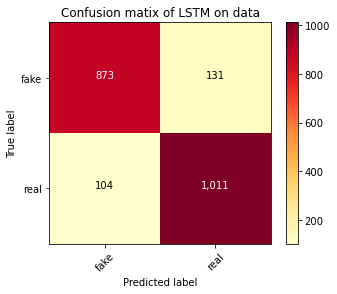

In [23]:
print('LSTM')
print ('val:')
print_metrices(y_pred,y_test)
"""
    Transform the data from the excel sheet which are not under 'label' 
    column and apply predict with the final estimator.

    This will be used later to print additional informations, like data types and memory used.
"""
create_confusion_matrix(confusion_matrix(y_test,y_pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of LSTM on data')